<a href="https://colab.research.google.com/github/Olayasser301/ForecastingProgram/blob/main/Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: ignored

In [ ]:
#from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('/content/Examination data.xlsx')

In [ ]:
df


,Month,Products,SumQ,Subtotal
0,August,"Stranded (Spool) (Earth, 4mm)",6.0,6536.59
1,August,"Stranded (Spool) (Red, 4mm)",6.0,6536.59
2,August,"Stranded (Spool) (Black, 4mm)",6.0,6536.59
3,August,"Stranded (Spool) (Blue, 4mm)",2.0,2178.86
4,August,"Stranded (Spool) (Earth, 3mm)",6.0,5051.81
...,...,...,...,...
9356,August,"Stranded (Spool) (Black, 1.5mm)",30.0,13190.04
9357,August,"Stranded (Spool) (Black, 2mm)",15.0,8740.01
9358,August,"Stranded (Spool) (Black, 3mm)",5.0,4209.84
9359,August,"Stranded (Spool) (Black, 4mm)",12.0,13073.18


In [ ]:
df[df.Products == 'Termo Flexible (3x4)'].sum()

Month        0.0
Products     0.0
SumQ         0.0
Subtotal     0.0
dtype: float64

In [ ]:
def get_product(df , product_name) :
  return df[df.Products == product_name]

In [ ]:
df.Products

0         Stranded (Spool) (Earth, 4mm)
1           Stranded (Spool) (Red, 4mm)
2         Stranded (Spool) (Black, 4mm)
3          Stranded (Spool) (Blue, 4mm)
4         Stranded (Spool) (Earth, 3mm)
                     ...               
9356    Stranded (Spool) (Black, 1.5mm)
9357      Stranded (Spool) (Black, 2mm)
9358      Stranded (Spool) (Black, 3mm)
9359      Stranded (Spool) (Black, 4mm)
9360     Stranded (Spool) (Black, 10mm)
Name: Products, Length: 9361, dtype: object

In [ ]:
df.Products == 'Termo Flexible (4x4)'

0       False
1       False
2       False
3       False
4       False
        ...  
9356    False
9357    False
9358    False
9359    False
9360    False
Name: Products, Length: 9361, dtype: bool

In [ ]:
(df.Products == 'Termo Flexible (4x4)').value_counts()

False    9361
Name: Products, dtype: int64

In [ ]:
df[df.Products == 'Termo Flexible (4x4)']

,Month,Products,SumQ,Subtotal


In [ ]:
get_product(df , 'Stranded (Spool) (Red, 4mm)')

,Month,Products,SumQ,Subtotal
1,August,"Stranded (Spool) (Red, 4mm)",6.0,6536.59
41,August,"Stranded (Spool) (Red, 4mm)",2.0,2178.86
52,August,"Stranded (Spool) (Red, 4mm)",1.0,1119.69
57,August,"Stranded (Spool) (Red, 4mm)",12.0,13073.18
75,August,"Stranded (Spool) (Red, 4mm)",12.0,12528.47
...,...,...,...,...
9210,August,"Stranded (Spool) (Red, 4mm)",3.0,3268.30
9221,August,"Stranded (Spool) (Red, 4mm)",2.0,2178.86
9234,August,"Stranded (Spool) (Red, 4mm)",1.0,1089.43
9266,August,"Stranded (Spool) (Red, 4mm)",2.0,2178.86


In [ ]:
def get_product_sum(df, product_name):
  dataframe = get_product(df, product_name)
  return dataframe.SumQ.sum()

def get_product_total(df, product_name):
  dataframe = get_product(df, product_name)
  return dataframe.Subtotal.sum()

def get_product_mean(df, product_name):
  dataframe = get_product(df, product_name)
  return dataframe.SumQ.mean()

In [ ]:
get_product_mean(df , 'Stranded (Spool) (Red, 4mm)')

5.493589743589744

In [ ]:
get_product_sum(df , 'Stranded (Spool) (Red, 4mm)')

1714.0

In [ ]:
prediction = 1100
ground_truth = 1000

In [ ]:
p1 = 1100
t1 = 900

p2 = 470
t2 = 450

mistake1 = abs(p1 - t1)
print("mistake 1 : ", mistake1)

mistake2 = abs(p2 - t2)
print("mistake 2 : ", mistake2)

mad = (mistake1 + mistake2) / 2
print("MAD: ", mad)

mistake 1 :  200
mistake 2 :  20
MAD:  110.0


In [ ]:
def compute_mad(predictions, truths):
  if len(predictions) != len(truths):
    raise Exception("Length of predictions should be equal to truths")

  n = len(predictions)
  error_sum = 0
  for i in range(n):
    p = predictions[i]
    t = truths[i]
    error = abs(t - p)
    error_sum += error

  return error_sum / n


In [ ]:
df.SumQ.mean()

7.936563706563707

In [ ]:
compute_mad(predictions, truths)

668.173976342129

In [ ]:
truths = []
predictions = []
for truth in df[df.Month == "August"].SumQ:
  prediction = df.SumQ.mean()
  truths.append(truth)
  predictions.append(prediction)

In [ ]:

compute_mad([1100, 470], [900, 450])

110.0

In [ ]:
# On average, we predict more or less than the real quantity by a 110 units.

In [ ]:
# predctions: predicted
# truths:

100

In [ ]:
for product_name in df.Products.unique():
  print(product_name)
  print(get_product_sum(df, product_name))
  #print(get_product_total(df, product_name))

Stranded (Spool) (Earth, 4mm)
2629.0
Stranded (Spool) (Red, 4mm)
1714.0
Stranded (Spool) (Black, 4mm)
3528.0
Stranded (Spool) (Blue, 4mm)
1518.0
Stranded (Spool) (Earth, 3mm)
5641.0
Stranded (Spool) (Red, 3mm)
3836.0
Stranded (Spool) (Black, 3mm)
7119.0
Stranded (Spool) (Earth, 6mm)
1052.0
Stranded (Spool) (Red, 6mm)
683.0
Stranded (Spool) (Black, 6mm)
1645.0
Stranded (Spool) (Black, 1.5mm)
2554.0
Stranded (Spool) (Red, 1.5mm)
2242.0
Stranded (Spool) (Yellow, 1.5mm)
2198.0
Stranded (Spool) (Earth, 1.5mm)
1841.0
Stranded (Spool) (Blue, 1.5mm)
2005.0
Stranded (Spool) (Black, 2mm)
5387.0
Stranded (Spool) (Red, 2mm)
3166.0
Stranded (Spool) (Yellow, 2mm)
3038.0
Stranded (Spool) (Earth, 2mm)
2700.0
Stranded (Spool) (Blue, 2mm)
2451.0
Flexible (Spool) (Black, 4mm)
75.0
Flexible (Spool) (Red, 4mm)
25.0
Flexible (Spool) (Yellow, 4mm)
22.0
Flexible (Spool) (Earth, 4mm)
20.0
Flexible (Spool) (Black, 3mm)
45.0
Flexible (Spool) (Red, 3mm)
36.0
Flexible (Spool) (Yellow, 3mm)
36.0
Flexible (Spool) (E

In [ ]:
#df_meh.to_excel('yarab erhamny last meter pred inshallah.xlsx')

In [ ]:
 month_to_num = {
     "March": 3 ,
     "April": 4 ,
    "May": 5 ,
    "June": 6 ,
    "July": 7 ,
    "August": 8
}

In [ ]:
df['MonthinNum'] = df.Month.replace(month_to_num)

In [ ]:
print(df)

       Month                         Products  SumQ  Subtotal   MonthinNum
0     August    Stranded (Spool) (Earth, 4mm)   6.0    6536.59           8
1     August      Stranded (Spool) (Red, 4mm)   6.0    6536.59           8
2     August    Stranded (Spool) (Black, 4mm)   6.0    6536.59           8
3     August     Stranded (Spool) (Blue, 4mm)   2.0    2178.86           8
4     August    Stranded (Spool) (Earth, 3mm)   6.0    5051.81           8
...      ...                              ...   ...        ...         ...
9356  August  Stranded (Spool) (Black, 1.5mm)  30.0   13190.04           8
9357  August    Stranded (Spool) (Black, 2mm)  15.0    8740.01           8
9358  August    Stranded (Spool) (Black, 3mm)   5.0    4209.84           8
9359  August    Stranded (Spool) (Black, 4mm)  12.0   13073.18           8
9360  August   Stranded (Spool) (Black, 10mm)   2.0    5339.03           8

[9361 rows x 5 columns]


In [ ]:
def get_product_sales_per_month(df, product_name):
  dataframe = get_product_sum(df, product_name)
  #dataframe = dataframe[dataframe.Month == month]
  return dataframe

In [ ]:
get_product_sales_per_month(df, "Stranded (Spool) (Black, 4mm)")

3528.0

In [ ]:
def generate_report(std_coefficient):
  report = []
  for product_name in df[df.Month == "August"].Products.unique():
    dataframe = get_product(df, product_name)
    # print(dataframe.shape[0])
    if dataframe.shape[0] > 1 :
      avgmean = round(dataframe.SumQ.mean())
      std = round(dataframe.SumQ.std())
      truth = get_product_sales_per_month(df, product_name, "August")
      min95 = round(max(avgmean-0.5*std , 0) , 2)
      max95 = round(max(avgmean+0.5*std , 0) , 2)
      report.append({
        'Products' : product_name ,
        'Truth': truth,
        'Mean (A)' : round(avgmean , 2) ,
        'Error (A)': abs(avgmean - truth),
        'Standered dev.' : round(std , 2),
        'Mini (B)' : min67,
        'Error (B)': abs(min67 - truth),
        'Maxi (C)' : max67 ,
        'Error (C)': abs(max67 - truth),
        #'Min 95% (D)' : min95,
       #'Error (D)' : abs(min95 -truth),
        #'Max 95% (E)' : max95,
        #'Error (E)': abs(max95 - truth)
    })

In [ ]:
def generate_report(factor):
  report = []
  for product_name in df.Products.unique():
    dataframe = get_product(df, product_name)
    # print(dataframe.shape[0])
    if dataframe.shape[0] > 1 :
      avgmean = round(dataframe.SumQ.mean())
      std = round(dataframe.SumQ.std())
      truth = get_product_sales_per_month(df, product_name)
      prediction = round(max(avgmean+factor*std , 0) , 2)
      report.append({
          'Products' : product_name ,
          'Truth': truth,
          'Prediction' : round(avgmean , 2) ,
          'Error': abs(prediction - truth)
      })
  return pd.DataFrame(report)

In [ ]:
df_report = pd.DataFrame(generate_report(2.9))
df_report

,Products,Truth,Prediction,Error
0,"Stranded (Spool) (Earth, 4mm)",2629.0,11,2528.1
1,"Stranded (Spool) (Red, 4mm)",1714.0,5,1668.4
2,"Stranded (Spool) (Black, 4mm)",3528.0,11,3406.8
3,"Stranded (Spool) (Blue, 4mm)",1518.0,7,1467.5
4,"Stranded (Spool) (Earth, 3mm)",5641.0,18,5480.9
...,...,...,...,...
101,"Flexible (Spool) (Red, 6mm)",7.0,1,6.0
102,"Aluminum (Spool) (Black, 35mm)",3.0,2,1.9
103,"Flexible (Spool) (Blue, 16mm)",8.0,1,7.0
104,"Flexible (Spool) (Yellow, 25mm)",4.0,1,3.0


In [ ]:
df_report.to_excel('final prediction spool.xlsx')

In [ ]:
import numpy as np

In [ ]:
list(np.arange(-3, 4, 0.1))

[-3.0,
 -2.9,
 -2.8,
 -2.6999999999999997,
 -2.5999999999999996,
 -2.4999999999999996,
 -2.3999999999999995,
 -2.2999999999999994,
 -2.1999999999999993,
 -2.099999999999999,
 -1.9999999999999991,
 -1.899999999999999,
 -1.799999999999999,
 -1.6999999999999988,
 -1.5999999999999988,
 -1.4999999999999987,
 -1.3999999999999986,
 -1.2999999999999985,
 -1.1999999999999984,
 -1.0999999999999983,
 -0.9999999999999982,
 -0.8999999999999981,
 -0.799999999999998,
 -0.699999999999998,
 -0.5999999999999979,
 -0.4999999999999978,
 -0.3999999999999977,
 -0.2999999999999976,
 -0.1999999999999975,
 -0.09999999999999742,
 2.6645352591003757e-15,
 0.10000000000000275,
 0.20000000000000284,
 0.30000000000000293,
 0.400000000000003,
 0.5000000000000031,
 0.6000000000000032,
 0.7000000000000033,
 0.8000000000000034,
 0.9000000000000035,
 1.0000000000000036,
 1.1000000000000032,
 1.2000000000000037,
 1.3000000000000043,
 1.400000000000004,
 1.5000000000000036,
 1.600000000000004,
 1.7000000000000046,
 1.8000

In [ ]:
generate_report(2.9)

,Products,Truth,Prediction,Error
0,"Stranded (Spool) (Earth, 4mm)",2629.0,11,2528.1
1,"Stranded (Spool) (Red, 4mm)",1714.0,5,1668.4
2,"Stranded (Spool) (Black, 4mm)",3528.0,11,3406.8
3,"Stranded (Spool) (Blue, 4mm)",1518.0,7,1467.5
4,"Stranded (Spool) (Earth, 3mm)",5641.0,18,5480.9
...,...,...,...,...
101,"Flexible (Spool) (Red, 6mm)",7.0,1,6.0
102,"Aluminum (Spool) (Black, 35mm)",3.0,2,1.9
103,"Flexible (Spool) (Blue, 16mm)",8.0,1,7.0
104,"Flexible (Spool) (Yellow, 25mm)",4.0,1,3.0


In [ ]:
error_report = []
for factor in np.arange(-3, 3, 0.1):
  mad = generate_report(factor).Error.mean()
  error_report.append({ "mad": mad, "factor": factor })

df_error_report = pd.DataFrame(error_report)
df_error_report

,mad,factor
0,694.990566,-3.000000e+00
1,694.977358,-2.900000e+00
2,694.964151,-2.800000e+00
3,694.950943,-2.700000e+00
4,694.937736,-2.600000e+00
5,694.924528,-2.500000e+00
6,694.911321,-2.400000e+00
7,694.898113,-2.300000e+00
8,694.884906,-2.200000e+00
9,694.871698,-2.100000e+00


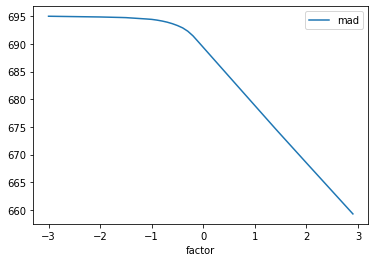

In [ ]:
df_error_report.plot(x="factor", y="mad")

In [ ]:
df_error_report[df_error_report["mad"] == df_error_report["mad"].min()]

,mad,factor
59,659.286792,2.9


In [ ]:
df_rep = pd.DataFrame(report)
df_rep

,Products,AugustSales,Mean (A),Error (A),Standered dev.,Mini (B),Error (B),Maxi (C),Error (C),Min 95% (D),Error (D),Max 95% (E),Error (E)
0,Termo Flexible (2x1),800,500,300,424,76,724,924,124,288.0,512.0,712.0,88.0
1,Termo Flexible (2x2),1500,907,593,877,30,1470,1784,284,468.5,1031.5,1345.5,154.5
2,Termo Flexible (2x4),200,200,0,141,59,141,341,141,129.5,70.5,270.5,70.5
3,Termo Flexible (4x6),200,267,67,208,59,141,475,275,163.0,37.0,371.0,171.0
4,Termo Flexible (3x10),100,100,0,1,99,1,101,1,99.5,0.5,100.5,0.5
5,Termo Flexible (2x6),100,133,33,58,75,25,191,91,104.0,4.0,162.0,62.0
6,"Stranded (Meter) (Earth, 50mm)",1413,691,722,551,140,1273,1242,171,415.5,997.5,966.5,446.5
7,Termo Flexible (4x10),125,312,187,265,47,78,577,452,179.5,54.5,444.5,319.5
8,Termo Flexible (4x16),120,274,154,196,78,42,470,350,176.0,56.0,372.0,252.0
9,Termo Flexible (4x4),400,450,50,71,379,21,521,121,414.5,14.5,485.5,85.5


In [ ]:
df_rep.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


AugustSales        608.772727
Mean (A)           810.227273
Error (A)          425.090909
Standered dev.     648.318182
Mini (B)           246.500000
Error (B)          362.272727
Maxi (C)          1458.545455
Error (C)          865.318182
Min 95% (D)        486.068182
Error (D)          290.250000
Max 95% (E)       1134.386364
Error (E)          598.522727
dtype: float64

In [ ]:
df[df.Products=='Stranded (Spool) (Red, 2.5mm)']

,Unnamed: 0,Month,Products,SumQ,total,MonthinNum


In [ ]:
df_rep.to_excel('demand_prediction Meter 3.xlsx')

In [ ]:
res = []
for product in df.Products.unique() :
 ## if df.Products == product :
     productaya = df[df.Products == product]
     if productaya.shape[0] > 1 :
       avgmean = round(productaya.SumQ.mean())
       std = round(productaya.SumQ.std())
       res.append({
         'Products' : product ,
         'Mean' : round(avgmean , 2) ,
         'Standered dev.' : round(std , 2),
         'Mini' : round(max(avgmean-std , 0) , 2),
         'Maxi' : round(avgmean+std,2) ,
         'Min 95%' : round(max(avgmean-2*std , 0) , 2),
         'Max 95%' : round(avgmean+ 2*std , 2)

   })